In [1]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma


from mpl_toolkits.axes_grid1 import make_axes_locatable #for subplot colorbars
from matplotlib.pyplot import cm

# configure plotting
%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'figure.figsize': (6, 6 / 1.6), 'font.size': 8, \
                            'figure.facecolor': (1, 1, 1, 0),'font.sans-serif':'Latin Modern Math'}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%matplotlib inline

# Loading data

## Flat smooth

In [3]:
os.chdir(
    '/Volumes/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Smooth/02_11_2022'
)

data = np.load('FlatSmooth_ensemble_I_profiles.npz')

FlatSmooth_ensemble_I_profiles  = data['data1']
FlatSmooth_ensemble_tw_mean_z = data['data2']


## Flat rough

In [4]:
os.chdir(
    '/Volumes/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Boundaries/Flat_Rough/02_14_2022'
)

data = np.load('FlatRough_ensemble_I_profiles.npz')

FlatRough_ensemble_I_profiles  = data['data1']
FlatRough_ensemble_tw_mean_z = data['data2']


## Plot

In [5]:
fs = 12
ms = 7
y = 10

############################################################
time_cumulative = list(np.logspace(1, 9, num=9, base=2))
time_cumulative.insert(0, 0)

labels = list(time_cumulative)


In [10]:
#a grainsize varible to normalize depth
d = 1e-4

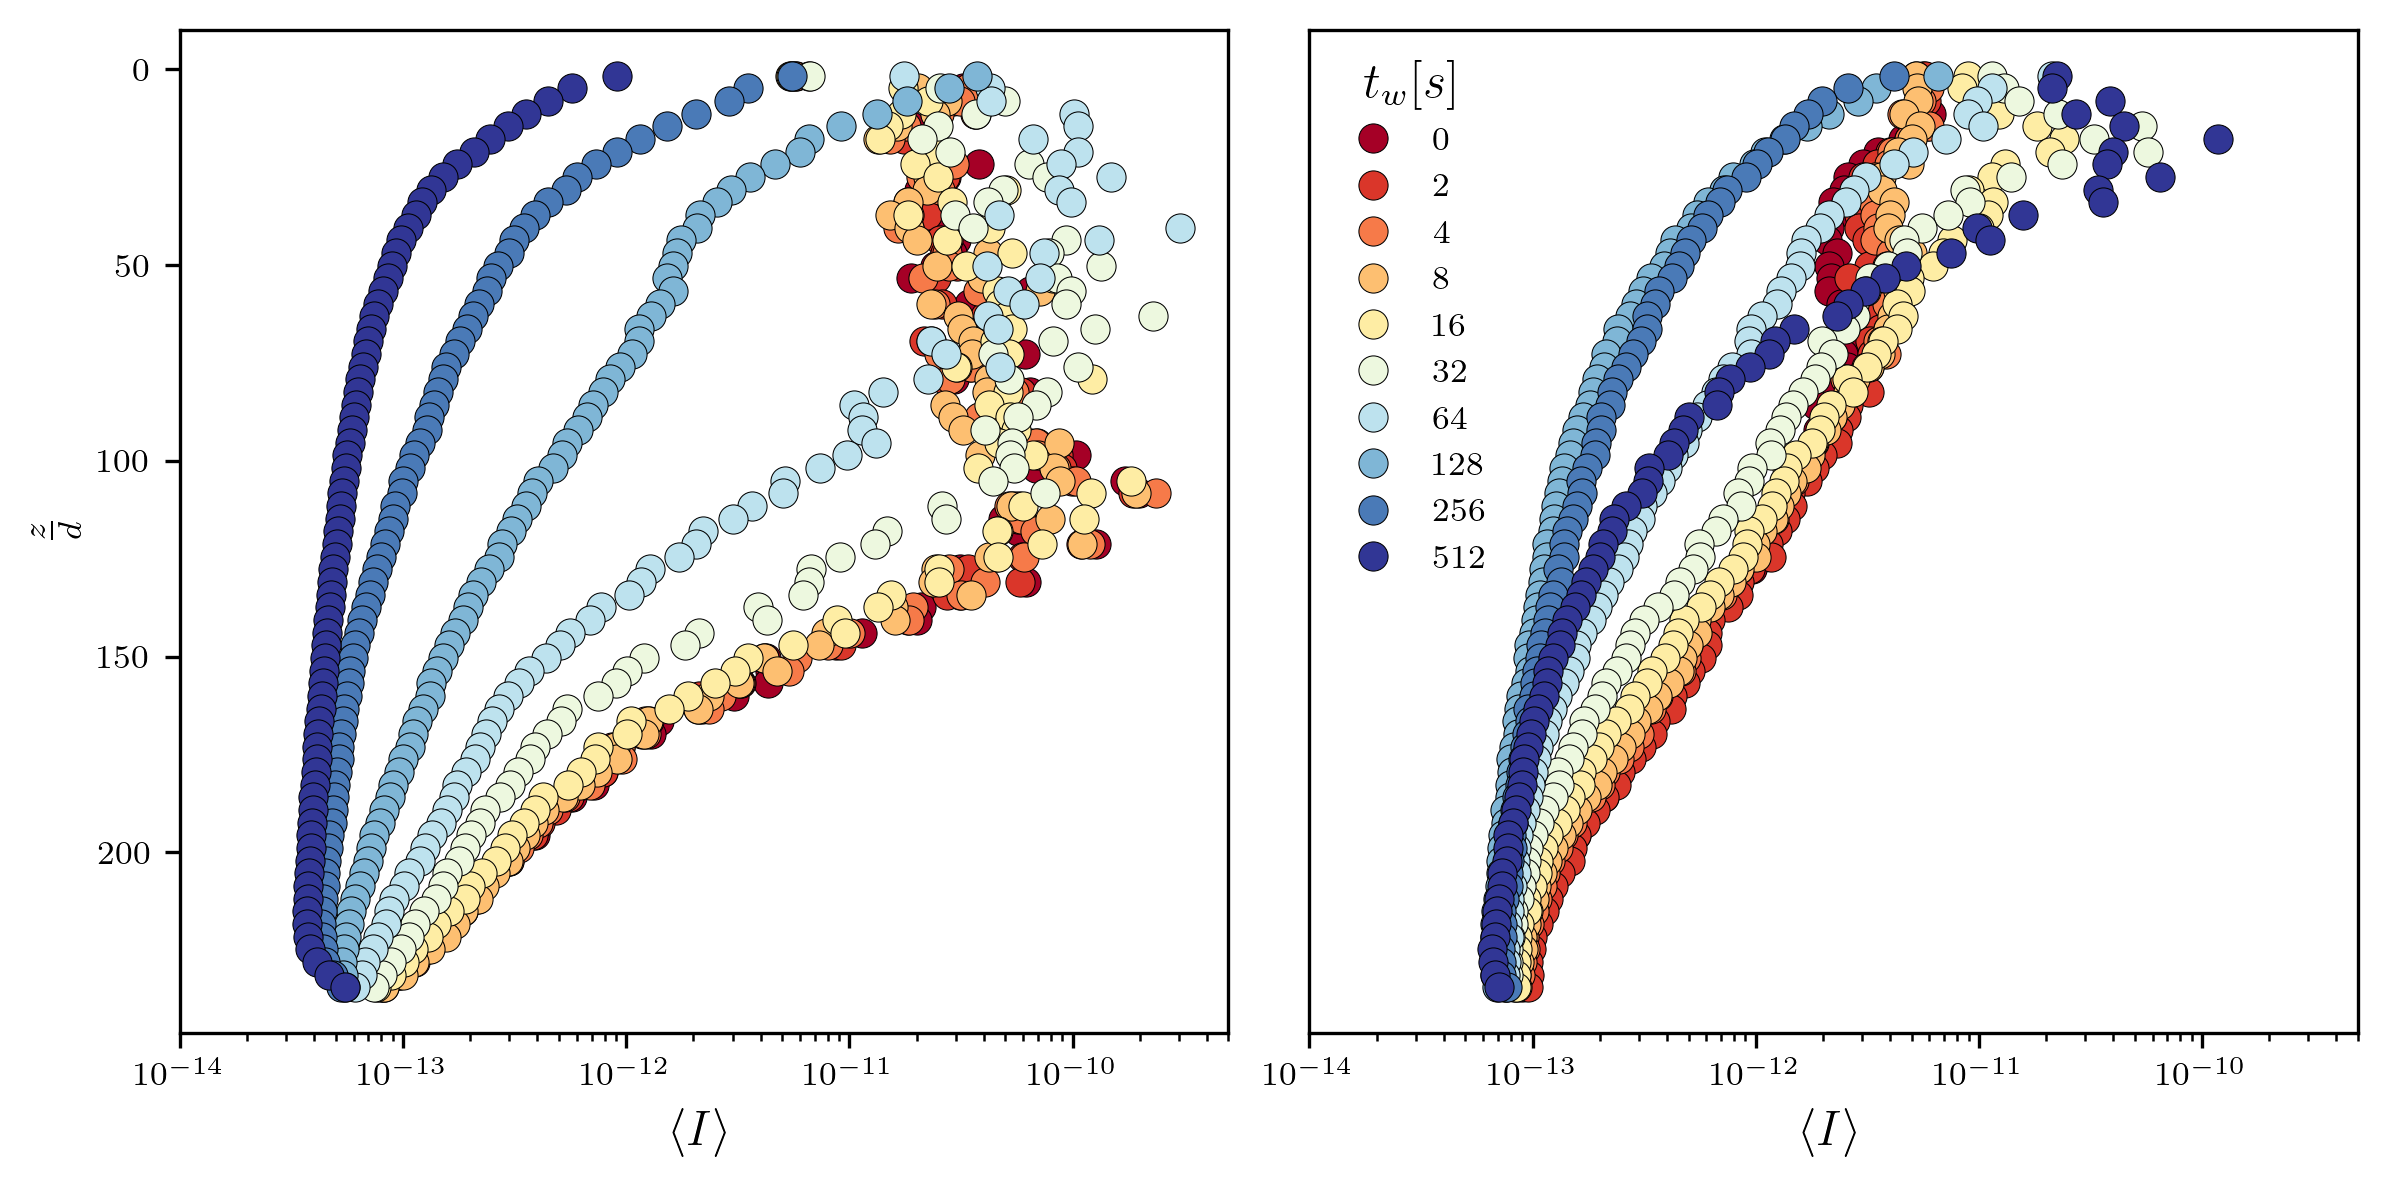

In [13]:
color = iter(cm.RdYlBu(np.linspace(0, 1, y)))

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for tw in range(y):
    c = next(color)
    ax1.plot(FlatSmooth_ensemble_I_profiles[tw][:73],
             FlatSmooth_ensemble_tw_mean_z[:73]/d,
             'o',
             color=c,
             markersize=ms,
             markeredgecolor='k',
             markeredgewidth=0.25,
             alpha=1,
             label=int(labels[tw]))

ax1.invert_yaxis()
# ax1.invert_xaxis()

ax1.set_xscale('log')
ax1.set_xlim([1e-14, 5e-10])

# ax1.set_title('Smooth')
ax1.set_xlabel(r'$\langle I \rangle$', fontsize=fs)
ax1.set_ylabel(r' $\frac{z}{d}$ ', fontsize=fs)

########################################################################################################################

color = iter(cm.RdYlBu(np.linspace(0, 1, y)))

for tw in range(y):
    c = next(color)
    ax2.plot(FlatRough_ensemble_I_profiles[tw][:73],
             FlatRough_ensemble_tw_mean_z[:73]/d,
             'o',
             color=c,
             markersize=ms,
             markeredgecolor='k',
             markeredgewidth=0.25,
             alpha=1,
             label=int(labels[tw]))

ax2.invert_yaxis()
# ax1.invert_xaxis()

ax2.set_xscale('log')

# ax2.set_title('Rough')
ax2.set_xlim([1e-14, 5e-10])
ax2.set_xlabel(r'$\langle I \rangle$', fontsize=fs)
ax2.set_yticks([])

ax2.legend(title=r'$ t_w [s]$',
           frameon=False,
           title_fontsize=12)

########################################################################################################################


plt.tight_layout()

plt.savefig('/Volumes/Extreme Pro/work/Manuscripts/Materials_Boundaries/Figures/Boundaries_I_profiles.svg', bbox_inches='tight')